## Long Short-Term Memory 

In this assignment, we will learn about LSTM models. We will create an LSTM model for time series prediction.

In [56]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, LSTM, Dropout, Flatten, GRU
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Below is a function for loading time series data collected by sensors. There are 9 different files, We have data about body acceleration, body gyro, and total acceleration for the x, y, and z axis

In [75]:
def load_func(path, file_ind=False):
    data_list = []
    if file_ind:
        filenames = [path]
    else:
        files = os.listdir(path)
        files.sort()
        filenames = [path + '/' + f for f in files]
    for f in filenames:
        dataframe = pd.read_csv(f, header=None, delim_whitespace=True)
        data_list.append(dataframe.values)
    if len(data_list) > 1:
        return np.dstack(data_list)
    else:
        return data_list[0]

In [76]:
os.listdir('/content/drive/MyDrive/Thinkful/DL/UCI HAR Dataset/train/Inertial Signals/')

['body_acc_y_train.txt',
 'body_gyro_z_train.txt',
 'body_acc_x_train.txt',
 'total_acc_z_train.txt',
 'body_gyro_x_train.txt',
 'body_gyro_y_train.txt',
 'total_acc_y_train.txt',
 'total_acc_x_train.txt',
 'body_acc_z_train.txt']

In [79]:
X_train = load_func("/content/drive/MyDrive/Thinkful/DL/UCI HAR Dataset/train/Inertial Signals")
X_test = load_func("/content/drive/MyDrive/Thinkful/DL/UCI HAR Dataset/test/Inertial Signals")
y_train_cat = load_func('/content/drive/MyDrive/Thinkful/DL/UCI HAR Dataset/train/y_train.txt', True)
y_test_cat = load_func('/content/drive/MyDrive/Thinkful/DL/UCI HAR Dataset/test/y_test.txt', True)

Print the dimensions of both the predictor variables and the target.

In [80]:
# Answer below:
print(X_train.shape, y_train_cat.shape)
print(X_test.shape, y_test_cat.shape)

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)


The target variable is categorical. One hot encode the target variable.

In [81]:
# Answer below:
# y_train_encoded = np.zeros((y_train_cat.flatten().size, y_train_cat.flatten().max()))
# y_train_encoded[np.arange(y_train_cat.flatten().size),(y_train_cat.flatten()-1)] = 1
# y_train_encoded.shape

In [82]:
# y_test_encoded = np.zeros((y_test_cat.flatten().size, y_test_cat.flatten().max()))
# y_test_encoded[np.arange(y_test_cat.flatten().size),(y_test_cat.flatten()-1)] = 1
# y_test_encoded.shape

In [83]:
# y_train_encoded = np.zeros((y_train_cat.flatten().size, y_train_cat.flatten().max()+1))
# y_train_encoded[np.arange(y_train_cat.flatten().size),y_train_cat.flatten()] = 1
# y_train_encoded.shape

In [84]:
y_train = to_categorical(y_train_cat.flatten() - 1, 6)
y_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [85]:
y_test= to_categorical(y_test_cat.flatten() - 1, 6)
y_test

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

Create a model containing an LSTM layer with unit size 100, and input shape that is the tuple containing the number of columns in X and the number of files in X.

The next layer is a dropout layer. Choose 0.5 for the proportion. Then add a dense layer of unit size 100 and finally an output dense layer. 

In [86]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
n_timesteps, n_features, n_outputs

(128, 9, 6)

In [87]:
model = Sequential()

model.add(LSTM(100, input_shape=(n_timesteps, n_features)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

Print the model summary to ensure you have the correct number of parameters.

In [88]:
# Answer below:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               44000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 606       
Total params: 54,706
Trainable params: 54,706
Non-trainable params: 0
_________________________________________________________________


Compile and fit the model. Select the appropriate activation, loss, and optimizer.

Run the model for 10 epochs with a batch size of 80.

In [89]:
# Answer below:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=80,
          validation_data=(X_test, y_test))

Epoch 1/10
92/92 [==============================] - 3s 17ms/step - loss: 1.4494 - accuracy: 0.3887 - val_loss: 1.1224 - val_accuracy: 0.5083
Epoch 2/10
92/92 [==============================] - 1s 11ms/step - loss: 1.0456 - accuracy: 0.5613 - val_loss: 0.8007 - val_accuracy: 0.6685
Epoch 3/10
92/92 [==============================] - 1s 11ms/step - loss: 0.6525 - accuracy: 0.7179 - val_loss: 0.6040 - val_accuracy: 0.7587
Epoch 4/10
92/92 [==============================] - 1s 11ms/step - loss: 0.4912 - accuracy: 0.8045 - val_loss: 0.5956 - val_accuracy: 0.7923
Epoch 5/10
92/92 [==============================] - 1s 11ms/step - loss: 0.3897 - accuracy: 0.8575 - val_loss: 0.4426 - val_accuracy: 0.8375
Epoch 6/10
92/92 [==============================] - 1s 11ms/step - loss: 0.3036 - accuracy: 0.8954 - val_loss: 0.4390 - val_accuracy: 0.8565
Epoch 7/10
92/92 [==============================] - 1s 11ms/step - loss: 0.2152 - accuracy: 0.9244 - val_loss: 0.3896 - val_accuracy: 0.8802
Epoch 8/10
92

Print the confusion matrix for the test data.

In [90]:
y_pred = np.argmax(model.predict(X_test), axis=-1)+1

In [91]:
np.unique(y_pred)

array([1, 2, 3, 4, 5, 6])

In [92]:
np.unique(y_test_cat)

array([1, 2, 3, 4, 5, 6])

In [98]:
cm = confusion_matrix(y_test_cat, y_pred)
cm

array([[477,  16,   3,   0,   0,   0],
       [ 39, 421,   9,   0,   2,   0],
       [  4,  22, 394,   0,   0,   0],
       [  0,  15,   2, 299, 172,   3],
       [  1,   1,   0,  30, 500,   0],
       [  0,  27,   0,   0,   0, 510]])

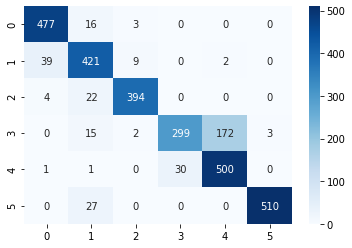

In [99]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')

#Lecture Notes

In [ ]:
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer

import nltk
nltk.download('stopwords')

In [13]:
tweets = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Tweets.csv')

In [14]:
tweets = tweets[['text','airline_sentiment']]

In [15]:

stemmer = PorterStemmer()

def remove_stopwords(input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words)       

def remove_mentions(input_text):
  return re.sub(r'@\w+', '', input_text)

def stem_list(word_list):
    stemmed = []
    for word in word_list:
        stemmedword = stemmer.stem(word)
        stemmed.append(stemmedword)
    return stemmed

def normalize(terms):
    terms = terms.lower()
    terms = remove_stopwords(terms)
    word_delimiters = u'[\\[\\]\n.!?,;:\t\\-\\"\\(\\)\\\'\u2019\u2013 ]'
    term_list = re.split(word_delimiters, terms)
    trimmed = [x.strip() for x in term_list]
    stemmed = stem_list(trimmed)
    space = ' '
    normed = space.join(stemmed)
    normed = normed.replace('  ', ' ').replace('  ', ' ')
    return normed.strip()

In [16]:
tweets.text = tweets.text.apply(remove_stopwords).apply(remove_mentions)

In [17]:
tweets['normalized'] = tweets.text.apply(normalize)

In [19]:
vocab_size = len(list(set(tweets['normalized'].apply(lambda x:x.split(' ')).sum())))
vocab_size

13038

In [20]:
tweets['encoded'] = tweets['normalized'].apply(one_hot, args=[vocab_size])

In [21]:
ind_vars = pad_sequences(tweets['encoded'])
ind_vars

array([[    0,     0,     0, ...,     0,     0,  6281],
       [    0,     0,     0, ...,  6552,  5174,  7926],
       [    0,     0,     0, ...,  3538,   643,  3451],
       ...,
       [    0,     0,     0, ..., 12836,  6257,  9850],
       [    0,     0,     0, ..., 11568,  9207, 12128],
       [    0,     0,     0, ...,  4389,  5578, 12551]], dtype=int32)

In [22]:
tweets['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [23]:
target = pd.get_dummies(tweets['airline_sentiment'])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(ind_vars, target, test_size=0.2)

In [25]:
max_words = np.max(ind_vars) + 1 #grabs largest numeric encoded value
max_words

13037

In [26]:
num_class = target.shape[1]
max_len = X_train.shape[1]

In [27]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length = max_len)) # 100 is output of embedding layer
model.add(LSTM(256))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_class, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 26, 100)           1303700   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               365568    
_________________________________________________________________
dense (Dense)                (None, 512)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 1,802,391
Trainable params: 1,802,391
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=128,
          validation_data=(X_test, y_test))

Epoch 1/50
92/92 [==============================] - 11s 29ms/step - loss: 0.8650 - accuracy: 0.6296 - val_loss: 0.5704 - val_accuracy: 0.7643
Epoch 2/50
92/92 [==============================] - 2s 21ms/step - loss: 0.4762 - accuracy: 0.8106 - val_loss: 0.5462 - val_accuracy: 0.7773
Epoch 3/50
92/92 [==============================] - 2s 22ms/step - loss: 0.3290 - accuracy: 0.8759 - val_loss: 0.6181 - val_accuracy: 0.7616
Epoch 4/50
92/92 [==============================] - 2s 21ms/step - loss: 0.2645 - accuracy: 0.9048 - val_loss: 0.6840 - val_accuracy: 0.7480
Epoch 5/50
92/92 [==============================] - 2s 21ms/step - loss: 0.2112 - accuracy: 0.9287 - val_loss: 0.7542 - val_accuracy: 0.7592
Epoch 6/50
92/92 [==============================] - 2s 22ms/step - loss: 0.1487 - accuracy: 0.9523 - val_loss: 0.8756 - val_accuracy: 0.7462
Epoch 7/50
92/92 [==============================] - 2s 21ms/step - loss: 0.1185 - accuracy: 0.9608 - val_loss: 0.9603 - val_accuracy: 0.7339
Epoch 8/50
9

In [30]:
from tensorflow.keras.layers import GRU

model = Sequential()
model.add(Embedding(max_words, 100, input_length = max_len)) # 100 is output of embedding layer
model.add(GRU(256))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_class, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 26, 100)           1303700   
_________________________________________________________________
gru_1 (GRU)                  (None, 256)               274944    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 1539      
Total params: 1,711,767
Trainable params: 1,711,767
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=128,
          validation_data=(X_test, y_test))

Epoch 1/10
92/92 [==============================] - 4s 25ms/step - loss: 0.8477 - accuracy: 0.6457 - val_loss: 0.5830 - val_accuracy: 0.7654
Epoch 2/10
92/92 [==============================] - 2s 21ms/step - loss: 0.4772 - accuracy: 0.8157 - val_loss: 0.5593 - val_accuracy: 0.7780
Epoch 3/10
92/92 [==============================] - 2s 21ms/step - loss: 0.3226 - accuracy: 0.8870 - val_loss: 0.6563 - val_accuracy: 0.7630
Epoch 4/10
92/92 [==============================] - 2s 21ms/step - loss: 0.2380 - accuracy: 0.9141 - val_loss: 0.7112 - val_accuracy: 0.7517
Epoch 5/10
92/92 [==============================] - 2s 20ms/step - loss: 0.1782 - accuracy: 0.9386 - val_loss: 0.7782 - val_accuracy: 0.7493
Epoch 6/10
92/92 [==============================] - 2s 21ms/step - loss: 0.1321 - accuracy: 0.9561 - val_loss: 0.9573 - val_accuracy: 0.7377
Epoch 7/10
92/92 [==============================] - 2s 21ms/step - loss: 0.1069 - accuracy: 0.9637 - val_loss: 1.0439 - val_accuracy: 0.7275
Epoch 8/10
92

In [32]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length = max_len)) # 100 is output of embedding layer
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(256))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_class, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 26, 100)           1303700   
_________________________________________________________________
lstm_1 (LSTM)                (None, 26, 256)           365568    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 1539      
Total params: 2,327,703
Trainable params: 2,327,703
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=128,
          validation_data=(X_test, y_test))

Epoch 1/10
92/92 [==============================] - 6s 34ms/step - loss: 0.8766 - accuracy: 0.6126 - val_loss: 0.6210 - val_accuracy: 0.7343
Epoch 2/10
92/92 [==============================] - 3s 27ms/step - loss: 0.5208 - accuracy: 0.7900 - val_loss: 0.5459 - val_accuracy: 0.7848
Epoch 3/10
92/92 [==============================] - 2s 25ms/step - loss: 0.3657 - accuracy: 0.8630 - val_loss: 0.5800 - val_accuracy: 0.7722
Epoch 4/10
92/92 [==============================] - 2s 25ms/step - loss: 0.2871 - accuracy: 0.8971 - val_loss: 0.6811 - val_accuracy: 0.7534
Epoch 5/10
92/92 [==============================] - 2s 24ms/step - loss: 0.1998 - accuracy: 0.9337 - val_loss: 0.7793 - val_accuracy: 0.7561
Epoch 6/10
92/92 [==============================] - 2s 25ms/step - loss: 0.1633 - accuracy: 0.9429 - val_loss: 0.8475 - val_accuracy: 0.7459
Epoch 7/10
92/92 [==============================] - 2s 24ms/step - loss: 0.1325 - accuracy: 0.9559 - val_loss: 1.0730 - val_accuracy: 0.7298
Epoch 8/10
92

In [34]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length = max_len)) # 100 is output of embedding layer
model.add(GRU(256, return_sequences=True))
model.add(GRU(256))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_class, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 26, 100)           1303700   
_________________________________________________________________
gru_2 (GRU)                  (None, 26, 256)           274944    
_________________________________________________________________
gru_3 (GRU)                  (None, 256)               394752    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 1539      
Total params: 2,106,519
Trainable params: 2,106,519
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=128,
          validation_data=(X_test, y_test))

Epoch 1/10
92/92 [==============================] - 5s 33ms/step - loss: 0.8273 - accuracy: 0.6379 - val_loss: 0.5934 - val_accuracy: 0.7565
Epoch 2/10
92/92 [==============================] - 2s 24ms/step - loss: 0.4571 - accuracy: 0.8233 - val_loss: 0.5660 - val_accuracy: 0.7719
Epoch 3/10
92/92 [==============================] - 2s 24ms/step - loss: 0.3203 - accuracy: 0.8797 - val_loss: 0.6018 - val_accuracy: 0.7657
Epoch 4/10
92/92 [==============================] - 2s 25ms/step - loss: 0.2284 - accuracy: 0.9199 - val_loss: 0.6883 - val_accuracy: 0.7541
Epoch 5/10
92/92 [==============================] - 2s 24ms/step - loss: 0.1894 - accuracy: 0.9326 - val_loss: 0.8142 - val_accuracy: 0.7555
Epoch 6/10
92/92 [==============================] - 2s 24ms/step - loss: 0.1361 - accuracy: 0.9537 - val_loss: 0.9806 - val_accuracy: 0.7449
Epoch 7/10
92/92 [==============================] - 2s 24ms/step - loss: 0.1067 - accuracy: 0.9645 - val_loss: 1.0886 - val_accuracy: 0.7377
Epoch 8/10
92